In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

import warnings
warnings.filterwarnings(action='ignore')

In [73]:
sep_data=pd.read_excel('Email Raw Data_24Sep20 (version 1).xlsx',sheet_name='Sep-Na_Filter',encoding = "ISO-8859-1")

In [74]:
sep_data.head()

,Subject,Sender,DateTimeReceived,Recevied_Date,ToLine,DatetimeReceivedPST,IsComplete,CompletedDate,CompletedBy,Category,...,Subject1,Subject2,Subject3,Subject4,Subject5,Subject6,ToLine.1,ToLine1,ToLine2,ToLine3
0,TRIM.20200903.06 // Confirmation Required // NDA,v-sakoge@microsoft.com,2020-09-10T00:39:17+00:00,2020-09-09,Sonia.Pirrello@microsoft.com,09/09/2020 05:39:17 PM,NaN,NaN,NaN,NaN,...,TRIM.20200903.06,Confirmation Required,NDA,NaN,NaN,NaN,Sonia.Pirrello,NaN,NaN,NaN
1,PO 99498593 // Confirmation Required// SOW // ...,v-shipaw@microsoft.com,2020-09-10T02:21:13+00:00,2020-09-09,Stephen.Mangan@microsoft.com,09/09/2020 07:21:13 PM,NaN,NaN,NaN,NaN,...,PO 99498593,Confirmation Required,SOW,Scrubbed SOW,NaN,NaN,Stephen.Mangan,NaN,NaN,NaN
2,PO 99509782 // Assistance Required // SOW// MMI,v-shvaib@microsoft.com,2020-09-10T02:23:00+00:00,2020-09-09,Neda.Vassey@microsoft.com,09/09/2020 07:23:0 PM,NaN,NaN,NaN,NaN,...,PO 99509782,Assistance Required,SOW,MMI,NaN,NaN,Neda.Vassey,NaN,NaN,NaN
3,RE: PO # 99445326 // Confirmation Required// Q...,v-shipaw@microsoft.com,2020-09-10T03:13:57+00:00,2020-09-09,Laura.Smith@microsoft.com;jabush@microsoft.com...,09/09/2020 08:13:57 PM,NaN,NaN,NaN,NaN,...,RE: PO # 99445326,Confirmation Required,Quotations,Signature Block,NaN,NaN,Laura.Smith,jabush,brshie,NaN
4,RE: PO# 99506936 // Confirmation Required// Qu...,v-shipaw@microsoft.com,2020-09-10T03:14:30+00:00,2020-09-09,v-alchiu@microsoft.com,09/09/2020 08:14:30 PM,NaN,NaN,NaN,NaN,...,RE: PO# 99506936,Confirmation Required,Quotations,Safe Approver Mismatch,NaN,NaN,v-alchiu,NaN,NaN,NaN


In [75]:
col=['ToLine.1', 'Recevied_Date', 'ToLine1', 'ToLine2','Subject2']
sep_data_new=sep_data[col]

In [76]:
sep_data_new.head()

,ToLine.1,Recevied_Date,ToLine1,ToLine2,Subject2
0,Sonia.Pirrello,2020-09-09,NaN,NaN,Confirmation Required
1,Stephen.Mangan,2020-09-09,NaN,NaN,Confirmation Required
2,Neda.Vassey,2020-09-09,NaN,NaN,Assistance Required
3,Laura.Smith,2020-09-09,jabush,brshie,Confirmation Required
4,v-alchiu,2020-09-09,NaN,NaN,Confirmation Required


In [77]:
sep_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ToLine.1       849 non-null    object        
 1   Recevied_Date  849 non-null    datetime64[ns]
 2   ToLine1        247 non-null    object        
 3   ToLine2        71 non-null     object        
 4   Subject2       849 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 33.3+ KB


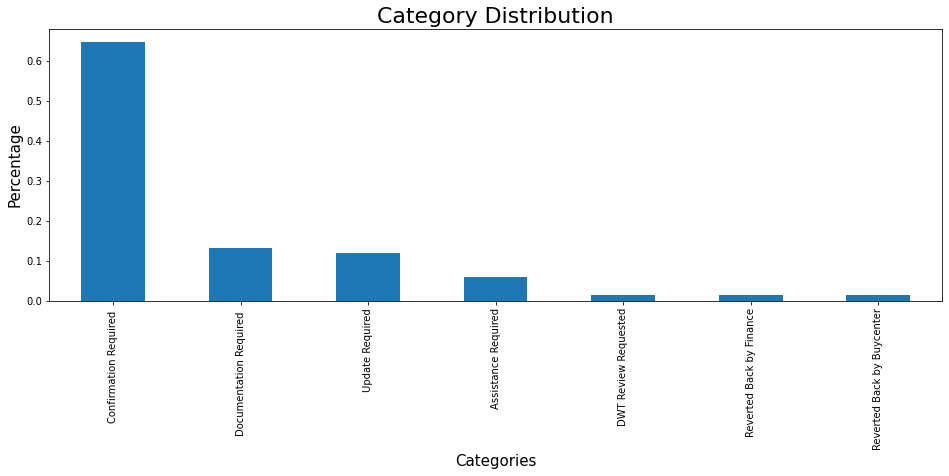

In [78]:
sep_data_new['Subject2'].value_counts(normalize=True).plot.bar(figsize=(16,5))
plt.title("Category Distribution",fontsize=22)
plt.ylabel("Percentage",fontsize=15,rotation=90)
plt.xlabel("Categories",fontsize=15)
plt.show()

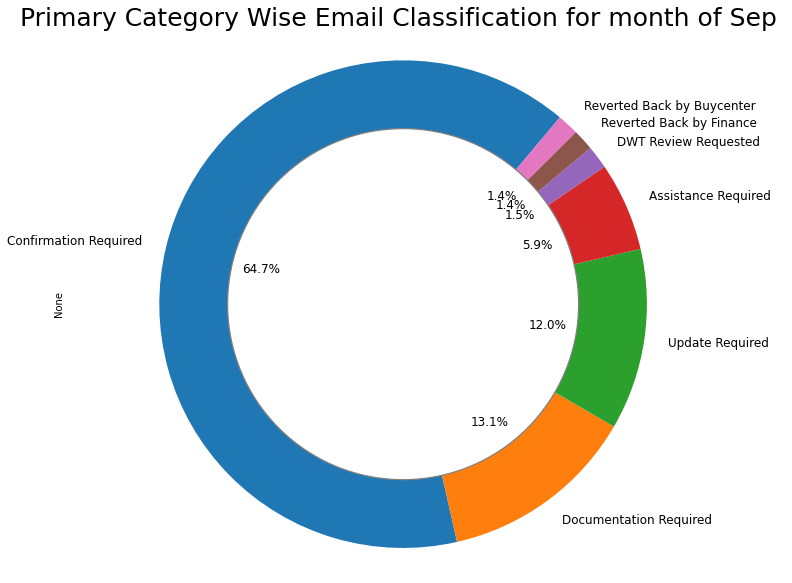

In [79]:
sep_data_new.Subject2.apply(pd.Series).stack().str.strip().value_counts()[:10].plot.pie(figsize=(12,10),startangle=50,autopct='%1.1f%%',fontsize=12)
plt.title("Primary Category Wise Email Classification for month of Sep ",fontsize=25)

#https://medium.com/@krishnakummar/donut-chart-with-python-matplotlib-d411033c960b
centre_circle = plt.Circle((0,0),0.72,color='gray', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

In [80]:
sep_data_new[:].nunique()

ToLine.1         279
Recevied_Date     18
ToLine1          121
ToLine2           38
Subject2           7
dtype: int64

In [81]:
sep_data_new['ToLine1'].value_counts()

v-pakotu          18
v-surehm          11
v-alchiu          10
v-niingo           8
warfly             6
                  ..
Stephen.Mangan     1
Mattias.Ersson     1
taparo             1
Lisa.Kuhn          1
Simon.Yip          1
Name: ToLine1, Length: 121, dtype: int64

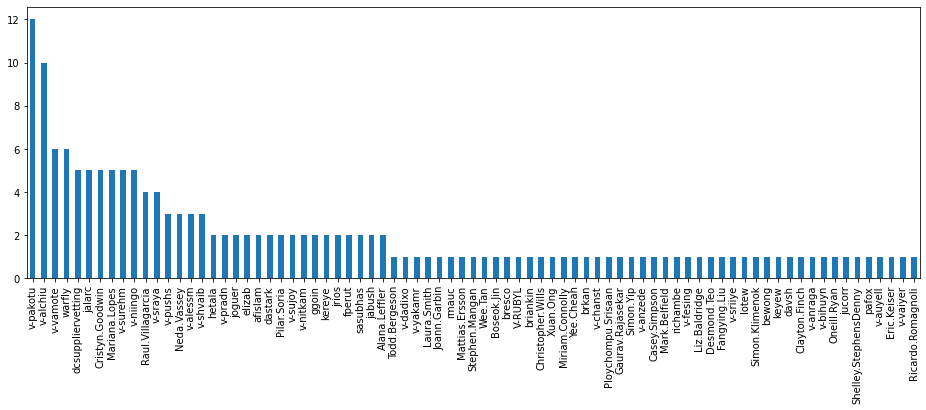

In [82]:
CR= sep_data_new[sep_data_new['Subject2']=='Confirmation Required ']
CR['ToLine1'].value_counts().plot.bar(figsize=(16,5))

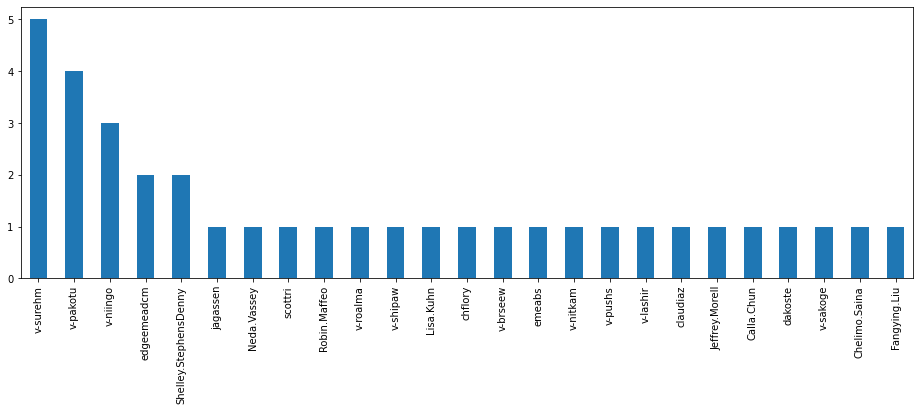

In [83]:
DR= sep_data_new[sep_data_new['Subject2']=='Documentation Required ']
DR['ToLine1'].value_counts().plot.bar(figsize=(16,5))

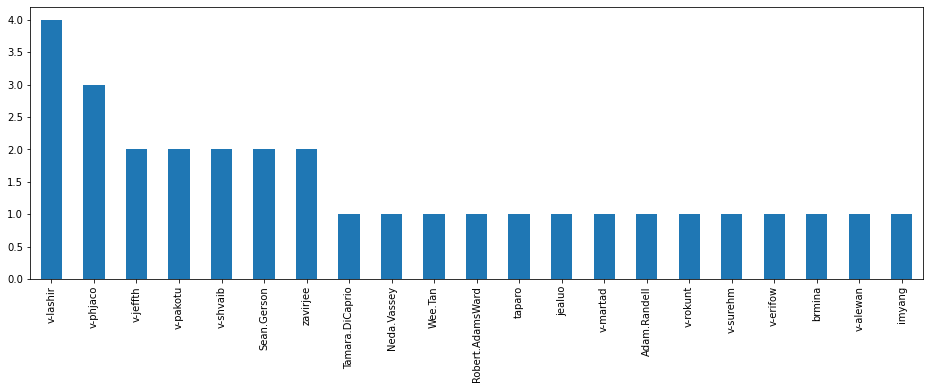

In [84]:
UR= sep_data_new[sep_data_new['Subject2']=='Update Required']
UR['ToLine1'].value_counts().plot.bar(figsize=(16,5))

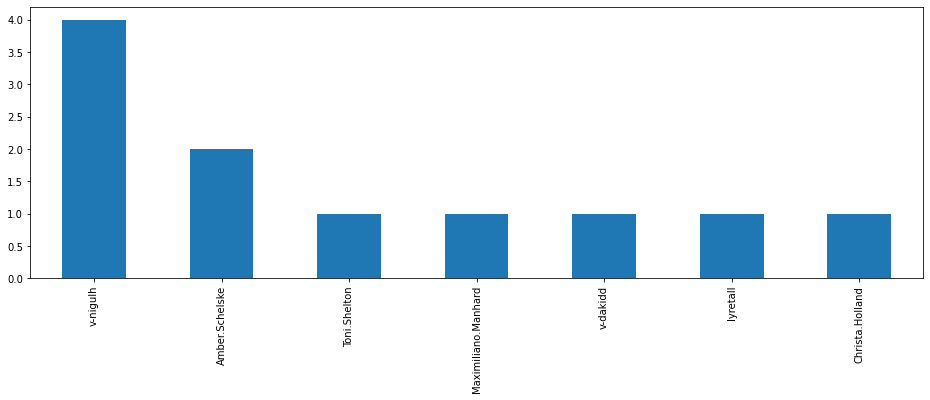

In [117]:
AR= sep_data_new[sep_data_new['Subject2']=='Assistance Required']
AR['ToLine1'].value_counts().plot.bar(figsize=(16,5))

In [3]:
# Analysis of Artificial Data Set
df1=pd.read_csv('Artificial_Training_data.csv',encoding='ISO-8859-1')

In [4]:
df1.head()

,ï»¿Subject,Type1,Type2,Type3,Combine-12,Combine-23,combine-123
0,PO/ VSO// Confirmation Required// Quotations /...,Confirmation Required,Quotations,Signature Block,Confirmation Required-Quotations,Quotations-Signature Block,Confirmation Required-Quotations-Signature Block
1,PO/ VSO// Confirmation Required// Quotations /...,Confirmation Required,Quotations,Amount Mismatch,Confirmation Required-Quotations,Quotations-Amount Mismatch,Confirmation Required-Quotations-Amount Mismatch
2,PO/ VSO// Confirmation Required// Quotations /...,Confirmation Required,Quotations,PO Category,Confirmation Required-Quotations,Quotations-PO Category,Confirmation Required-Quotations-PO Category
3,PO/ VSO// Confirmation Required// Quotations /...,Confirmation Required,Quotations,Quote Expired,Confirmation Required-Quotations,Quotations-Quote Expired,Confirmation Required-Quotations-Quote Expired
4,PO/ VSO// Confirmation Required// Quotations /...,Confirmation Required,Quotations,Currency mismatch,Confirmation Required-Quotations,Quotations-Currency mismatch,Confirmation Required-Quotations-Currency mism...


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ï»¿Subject   322 non-null    object
 1   Type1        224 non-null    object
 2   Type2        284 non-null    object
 3   Type3        322 non-null    object
 4   Combine-12   322 non-null    object
 5   Combine-23   322 non-null    object
 6   combine-123  322 non-null    object
dtypes: object(7)
memory usage: 17.7+ KB


In [6]:
df1.rename(columns={'ï»¿Subject':'Subject','combine-123':'Combine-123'},inplace=True)

In [7]:
df1[:].nunique()

Subject        107
Type1            4
Type2            9
Type3           43
Combine-12      30
Combine-23      72
Combine-123     87
dtype: int64

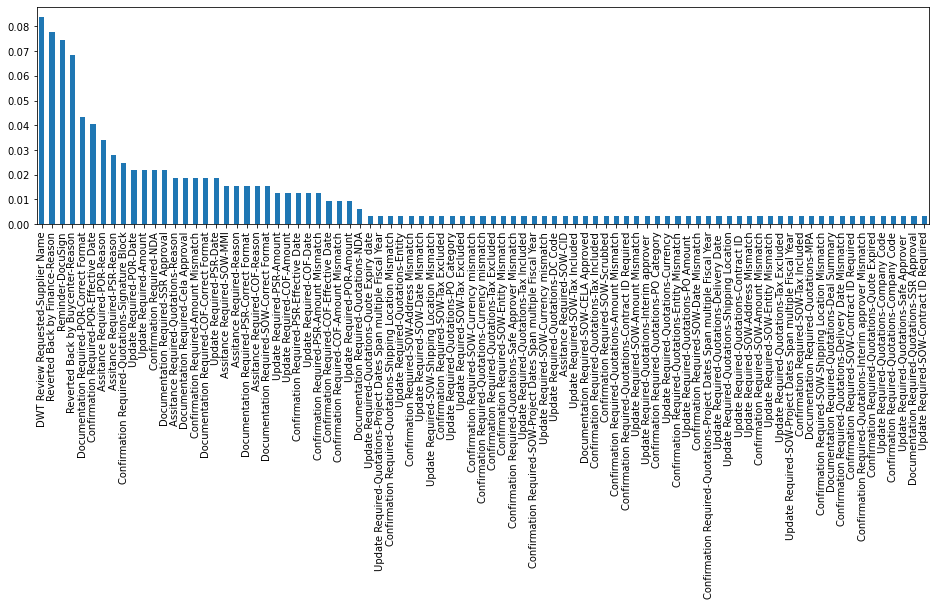

In [8]:
df1['Combine-123'].value_counts(normalize=True).plot.bar(figsize=(16,4))

In [10]:
df1['Combine-123'].value_counts().nlargest(20)

DWT Review Requested-Supplier Name                  27
Reverted Back by Finance-Reason                     25
Reminder-DocuSign                                   24
Reverted Back by Buycenter-Reason                   22
Documentation Required-POR-Correct Format           14
Confirmation Required-POR-Effective Date            13
Assitance Required-POR-Reason                       11
Assitance Required-PSR-Reason                        9
Confirmation Required-Quotations-Signature Block     8
Update Required-POR-Date                             7
Update Required-Amount                               7
Confirmation Required-NDA                            7
Documentation Required-SSR Approval                  7
Assitance Required-Quotations-Reason                 6
Documentation Required-Cela Approval                 6
Confirmation Required-Amount Mismatch                6
Documentation Required-COF-Correct Format            6
Update Required-PSR-Date                             6
Assitance 

In [11]:
df1['Combine-123'].value_counts().nsmallest(20)

Update Required-Quotations-Quote Expiry date                          1
Update Required-Quotations-Project Dates Span multiple Fiscal Year    1
Confirmation Required-Quotations-Shipping Location Mismatch           1
Update Required-Quotations-Entity                                     1
Confirmation Required-SOW-Address Mismatch                            1
Update Required-SOW-Date Mismatch                                     1
Update Required-SOW-Shipping Location Mismatch                        1
Confirmation Required-SOW-Tax Excluded                                1
Update Required-Quotations-PO Category                                1
Update Required-SOW-Tax Excluded                                      1
Confirmation Required-SOW-Currency mismatch                           1
Confirmation Required-Quotations-Currency mismatch                    1
Confirmation Required-Quotations-Tax Excluded                         1
Confirmation Required-SOW-Entity Mismatch                       

In [13]:
!pip install imblearn

In [16]:
col1=['Subject','Combine-123']
df2_tosample=df1[col1]

In [17]:
df2_tosample.head()

,Subject,Combine-123
0,PO/ VSO// Confirmation Required// Quotations /...,Confirmation Required-Quotations-Signature Block
1,PO/ VSO// Confirmation Required// Quotations /...,Confirmation Required-Quotations-Amount Mismatch
2,PO/ VSO// Confirmation Required// Quotations /...,Confirmation Required-Quotations-PO Category
3,PO/ VSO// Confirmation Required// Quotations /...,Confirmation Required-Quotations-Quote Expired
4,PO/ VSO// Confirmation Required// Quotations /...,Confirmation Required-Quotations-Currency mism...


In [19]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()

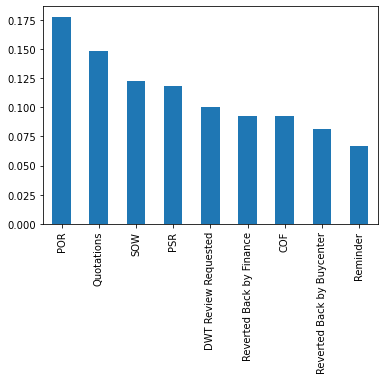

In [124]:
df1['Type2'].value_counts(normalize=True).plot.bar()

In [127]:
import nltk
from nltk.corpus import stopwords
!pip install textblob
from textblob import TextBlob
from textblob import Word
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from scipy.sparse import csr_matrix
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\v-akrupl\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [128]:
# Let's check how many words are present in each ticket
df1['word_count'] = df1['Subject'].apply(lambda x: len(str(x).split()))
print(df1['word_count'].mean())
stop = stopwords.words('english') # Create stop words
#print(stop)
df1['stopwords'] = df1['Subject'].apply(lambda x: len([x for x in x.split() if x in stop]))
df1.head()

6.808441558441558


,Subject,Type1,Type2,Type3,Combine-12,Combine-23,Combine-123,word_count,stopwords
0,PO/ VSO// Confirmation Required// Quotations /...,Confirmation Required,Quotations,Signature Block,Confirmation Required-Quotations,Quotations-Signature Block,Confirmation Required-Quotations-Signature Block,8,0
1,PO/ VSO// Confirmation Required// Quotations /...,Confirmation Required,Quotations,Amount Mismatch,Confirmation Required-Quotations,Quotations-Amount Mismatch,Confirmation Required-Quotations-Amount Mismatch,8,0
2,PO/ VSO// Confirmation Required// Quotations /...,Confirmation Required,Quotations,PO Category,Confirmation Required-Quotations,Quotations-PO Category,Confirmation Required-Quotations-PO Category,8,0
3,PO/ VSO// Confirmation Required// Quotations /...,Confirmation Required,Quotations,Quote Expired,Confirmation Required-Quotations,Quotations-Quote Expired,Confirmation Required-Quotations-Quote Expired,8,0
4,PO/ VSO// Confirmation Required// Quotations /...,Confirmation Required,Quotations,Currency mismatch,Confirmation Required-Quotations,Quotations-Currency mismatch,Confirmation Required-Quotations-Currency mism...,8,0


In [130]:
df1['stopwords'].describe()

count    308.000000
mean       0.152597
std        0.360184
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: stopwords, dtype: float64

In [131]:
df1['Subject'] = df1['Subject'].apply(lambda x: " ".join(x.lower() for x in x.split())) # Converting Lower case
df1['Subject'] = df1['Subject'].str.replace('[^\w\s]',' ').str.replace('_',' ') # Removing Punctuation
df1['Subject'] = df1['Subject'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) # Removal of Stop Words
# Removal of numbers
df1['Subject'] = df1['Subject'].str.replace('[0-9]','') # Remove numbers
df1.head()

,Subject,Type1,Type2,Type3,Combine-12,Combine-23,Combine-123,word_count,stopwords
0,po vso confirmation required quotations signat...,Confirmation Required,Quotations,Signature Block,Confirmation Required-Quotations,Quotations-Signature Block,Confirmation Required-Quotations-Signature Block,8,0
1,po vso confirmation required quotations amount...,Confirmation Required,Quotations,Amount Mismatch,Confirmation Required-Quotations,Quotations-Amount Mismatch,Confirmation Required-Quotations-Amount Mismatch,8,0
2,po vso confirmation required quotations po cat...,Confirmation Required,Quotations,PO Category,Confirmation Required-Quotations,Quotations-PO Category,Confirmation Required-Quotations-PO Category,8,0
3,po vso confirmation required quotations quote ...,Confirmation Required,Quotations,Quote Expired,Confirmation Required-Quotations,Quotations-Quote Expired,Confirmation Required-Quotations-Quote Expired,8,0
4,po vso confirmation required quotations curren...,Confirmation Required,Quotations,Currency mismatch,Confirmation Required-Quotations,Quotations-Currency mismatch,Confirmation Required-Quotations-Currency mism...,8,0


In [133]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\v-akrupl\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [134]:
# Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.
df1['Subject']=df1['Subject'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
#Converting to Bag of words/Document term matrix
bow = CountVectorizer() # Converting to matrix
df1_bow = bow.fit_transform(df1['Subject'])
df1_bow

<308x74 sparse matrix of type '<class 'numpy.int64'>'
	with 1983 stored elements in Compressed Sparse Row format>

In [135]:
df1_dtm=pd.DataFrame(bow.fit_transform(df1['Subject']).toarray(), columns=bow.get_feature_names()) # 
df1_dtm[:].sum()

address       2
amount       35
approval     14
approved      1
approver      4
           ... 
title        18
trim        109
update       60
vso         222
year          4
Length: 74, dtype: int64